In [265]:
import pandas as pd
import numpy as np
import os

mainfl=pd.read_csv('LearnProjects\\FoodDemandPrediction\\Train\\train.csv')
meal_info=pd.read_csv('earnProjects\\FoodDemandPrediction\\Train\\meal_info.csv')

fulfilment_center_info=pd.read_csv('LearnProjects\\FoodDemandPrediction\\Train\\fulfilment_center_info.csv')

test_raw=pd.read_csv('LearnProjects\\FoodDemandPrediction\\Test.csv')

In [273]:
test_raw.head()
test=pd.merge(test_raw,meal_info,on='meal_id')
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai
1,1460444,146,24,1885,158.11,160.11,0,1,Beverages,Thai
2,1098228,146,11,1885,158.17,157.17,0,0,Beverages,Thai
3,1316160,146,83,1885,142.59,143.59,0,0,Beverages,Thai
4,1390579,146,32,1885,122.28,121.28,0,0,Beverages,Thai


In [274]:
train=pd.merge(mainfl,meal_info,on='meal_id')
train=pd.merge(train,fulfilment_center_info,on='center_id')

test=pd.merge(test_raw,meal_info,on='meal_id')
test=pd.merge(test,fulfilment_center_info,on='center_id')

In [275]:
df=pd.concat([train,test],axis=0,sort=False)

In [277]:
import matplotlib as plt
df[df.num_orders.isnull()].head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,NaN,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,NaN,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,NaN,Beverages,Thai,647,56,TYPE_C,2.0
3,1262599,150,55,1885,159.14,157.14,0,0,NaN,Beverages,Thai,647,56,TYPE_C,2.0
4,1495848,151,55,1885,160.11,159.11,0,0,NaN,Beverages,Thai,647,56,TYPE_C,2.0


In [278]:
%matplotlib inline

In [279]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323.0,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96.0,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163.0,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215.0,Beverages,Thai,647,56,TYPE_C,2.0


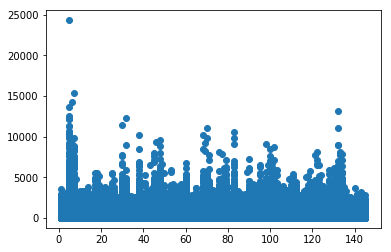

In [280]:
import matplotlib.pyplot as plt
plt.scatter(df[df['num_orders'].notnull()]['week'],df[df['num_orders'].notnull()]['num_orders'])

df.describe()

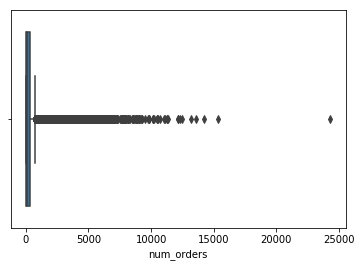

In [281]:
#df.describe()
import seaborn as sns
sns.boxplot(x=df[df['num_orders'].notnull()]['num_orders'])

In [282]:
pd.crosstab(df[df['num_orders'].notnull()]['meal_id'],df[df['num_orders'].notnull()]['num_orders'])
df.groupby(df[df['num_orders'].notnull()]['meal_id'])['num_orders'].mean()

meal_id
1062    423.165574
1109    571.921412
1198    242.101759
1207    166.653341
1216     55.034966
1230    171.595850
1247     32.279649
1248     88.011872
1311    318.171935
1438     90.098974
1445    108.894932
1525    183.713858
1543     77.279894
1558    159.691381
1571     89.765462
1727    425.286189
1754    612.473859
1770     28.540706
1778    297.489704
1803    316.007274
1847     67.981146
1878    146.483044
1885    752.456365
1902     31.008002
1962    291.144502
1971    515.998919
1993    598.853544
2104     67.864658
2126     61.574446
2139     42.813462
2290    877.204435
2304     62.978297
2306     61.080299
2322    208.891202
2444    103.613059
2490    401.116578
2492     57.593157
2494     87.238944
2539    309.494594
2569    352.510731
2577    117.887966
2581    216.672688
2631    104.239051
2640    194.041128
2664    395.900944
2704    164.192845
2707    533.380563
2760    140.662063
2826    460.351180
2867     88.226026
2956     92.518831
Name: num_orders, dtype

In [283]:
df['category'].value_counts()

Beverages       136781
Rice Bowl        35717
Sandwich         35599
Pizza            35444
Starters         31925
Other Snacks     31483
Desert           31407
Salad            30868
Pasta            29621
Seafood          28613
Biryani          21951
Extras           14554
Soup             13640
Fish             11518
Name: category, dtype: int64

In [284]:
catOrders=df.groupby(df[df['num_orders'].notnull()]['category'])['num_orders'].mean()
#pd.crosstab(df[df['num_orders'].notnull()]['category'],df[df['num_orders'].notnull()]['num_orders'])


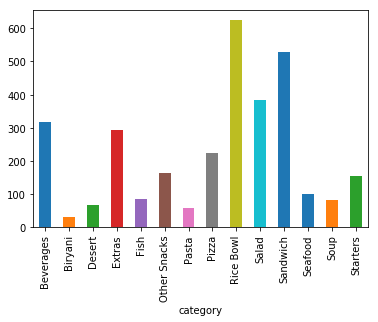

In [285]:
catOrders.plot(kind='bar')

In [286]:
df['center_type']

0        TYPE_C
1        TYPE_C
2        TYPE_C
3        TYPE_C
4        TYPE_C
5        TYPE_C
6        TYPE_C
7        TYPE_C
8        TYPE_C
9        TYPE_C
10       TYPE_C
11       TYPE_C
12       TYPE_C
13       TYPE_C
14       TYPE_C
15       TYPE_C
16       TYPE_C
17       TYPE_C
18       TYPE_C
19       TYPE_C
20       TYPE_C
21       TYPE_C
22       TYPE_C
23       TYPE_C
24       TYPE_C
25       TYPE_C
26       TYPE_C
27       TYPE_C
28       TYPE_C
29       TYPE_C
          ...  
32543    TYPE_A
32544    TYPE_A
32545    TYPE_A
32546    TYPE_A
32547    TYPE_A
32548    TYPE_A
32549    TYPE_A
32550    TYPE_A
32551    TYPE_A
32552    TYPE_A
32553    TYPE_A
32554    TYPE_A
32555    TYPE_A
32556    TYPE_A
32557    TYPE_A
32558    TYPE_A
32559    TYPE_A
32560    TYPE_A
32561    TYPE_A
32562    TYPE_A
32563    TYPE_A
32564    TYPE_A
32565    TYPE_A
32566    TYPE_A
32567    TYPE_A
32568    TYPE_A
32569    TYPE_A
32570    TYPE_A
32571    TYPE_A
32572    TYPE_A
Name: center_type, Lengt

In [287]:
df.cuisine.value_counts()

Italian        131761
Thai           126558
Indian         120419
Continental    110383
Name: cuisine, dtype: int64

In [288]:
cuisineOrders=df.groupby(df[df['num_orders'].notnull()]['cuisine'])['num_orders'].mean()

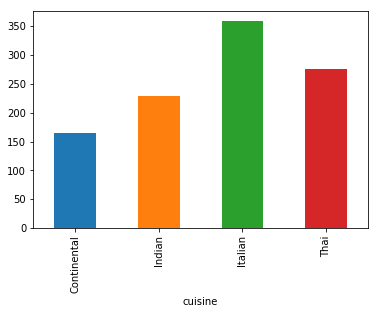

In [289]:
cuisineOrders.plot('bar')

In [290]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323.0,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96.0,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163.0,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215.0,Beverages,Thai,647,56,TYPE_C,2.0


In [291]:
df[num_orders_log]=np.log(df[df.num_orders.notnull()]['num_orders']+1.0)

NameError: name 'num_orders_log' is not defined

(array([7.14280e+04, 5.67570e+04, 9.02830e+04, 1.03385e+05, 8.57870e+04,
        3.77230e+04, 9.47400e+03, 1.50300e+03, 1.99000e+02, 9.00000e+00]),
 array([ 2.63905733,  3.38497476,  4.13089219,  4.87680962,  5.62272705,
         6.36864448,  7.11456191,  7.86047934,  8.60639677,  9.3523142 ,
        10.09823163]),
 <a list of 10 Patch objects>)

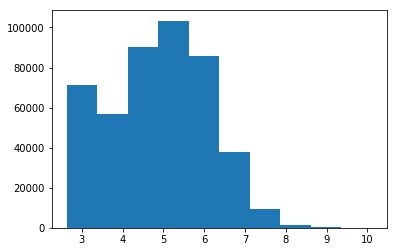

In [292]:
plt.hist(num_orders)

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489121 entries, 0 to 32572
Data columns (total 15 columns):
id                       489121 non-null int64
week                     489121 non-null int64
center_id                489121 non-null int64
meal_id                  489121 non-null int64
checkout_price           489121 non-null float64
base_price               489121 non-null float64
emailer_for_promotion    489121 non-null int64
homepage_featured        489121 non-null int64
num_orders               456548 non-null float64
category                 489121 non-null object
cuisine                  489121 non-null object
city_code                489121 non-null int64
region_code              489121 non-null int64
center_type              489121 non-null object
op_area                  489121 non-null float64
dtypes: float64(4), int64(8), object(3)
memory usage: 59.7+ MB


In [294]:
df=pd.get_dummies(df,columns=['category','cuisine','center_type'])

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489121 entries, 0 to 32572
Data columns (total 33 columns):
id                       489121 non-null int64
week                     489121 non-null int64
center_id                489121 non-null int64
meal_id                  489121 non-null int64
checkout_price           489121 non-null float64
base_price               489121 non-null float64
emailer_for_promotion    489121 non-null int64
homepage_featured        489121 non-null int64
num_orders               456548 non-null float64
city_code                489121 non-null int64
region_code              489121 non-null int64
op_area                  489121 non-null float64
category_Beverages       489121 non-null uint8
category_Biryani         489121 non-null uint8
category_Desert          489121 non-null uint8
category_Extras          489121 non-null uint8
category_Fish            489121 non-null uint8
category_Other Snacks    489121 non-null uint8
category_Pasta           489121 non-

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489121 entries, 0 to 32572
Data columns (total 33 columns):
id                       489121 non-null int64
week                     489121 non-null int64
center_id                489121 non-null int64
meal_id                  489121 non-null int64
checkout_price           489121 non-null float64
base_price               489121 non-null float64
emailer_for_promotion    489121 non-null int64
homepage_featured        489121 non-null int64
num_orders               456548 non-null float64
city_code                489121 non-null int64
region_code              489121 non-null int64
op_area                  489121 non-null float64
category_Beverages       489121 non-null uint8
category_Biryani         489121 non-null uint8
category_Desert          489121 non-null uint8
category_Extras          489121 non-null uint8
category_Fish            489121 non-null uint8
category_Other Snacks    489121 non-null uint8
category_Pasta           489121 non-

In [297]:
Train_df=df[df.num_orders.notnull()]
Test_df=df[df.num_orders.isnull()]

In [298]:
Train_df.shape, Test_df.shape
Y=Train_df['num_orders'].ravel()
print(Y.shape, Train_df.shape)

(456548,) (456548, 33)


In [353]:
#Y=Train_df['num_orders']
Train_cols=[i for i in Train_df.columns if i != ('num_orders','id')]
Train_df=Train_df[Train_cols]
Train_df.shape
Train_df=Train_df.iloc[:,1:]
#print(Train_cols,Y.shape, Train_df.shape)
#

In [354]:
from sklearn.model_selection import train_test_split

In [355]:
X_train, x_test,y_train,y_test = train_test_split(Train_df,Y,random_state=0,test_size=0.2)

In [356]:
from sklearn.linear_model import LinearRegression

In [357]:
X_train.shape, y_train.shape,x_test.shape,y_test.shape

((365238, 31), (365238,), (91310, 31), (91310,))

In [358]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [359]:
p=lr.predict(x_test)
#p1=lr.predict(Test_df)
Test_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,...,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,...,0,0,0,0,0,0,1,0,0,1
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,...,0,0,0,0,0,0,1,0,0,1
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,...,0,0,0,0,0,0,1,0,0,1
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,...,0,0,0,0,0,0,1,0,0,1
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,...,0,0,0,0,0,0,1,0,0,1


In [360]:
lr.intercept_

-44.03990926525711

In [361]:
def rmsle(predicted, real):
    sum=0.0
    for x in range(len(predicted)):
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5

In [362]:
rmsle(p,y_test)

anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


nan

In [364]:
from sklearn.metrics import r2_score
r2_score(y_test,p)

0.414727170732362

In [365]:
#Test_df.drop(columns='num_orders',axis=1,inplace=True)
#Test_df.head()
Test_df_val=Test_df.iloc[:,1:]
Test_df_val.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,...,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C
0,146,55,1885,158.11,159.11,0,0,647,56,2.0,...,0,0,0,0,0,0,1,0,0,1
1,147,55,1885,159.11,159.11,0,0,647,56,2.0,...,0,0,0,0,0,0,1,0,0,1
2,149,55,1885,157.14,158.14,0,0,647,56,2.0,...,0,0,0,0,0,0,1,0,0,1
3,150,55,1885,159.14,157.14,0,0,647,56,2.0,...,0,0,0,0,0,0,1,0,0,1
4,151,55,1885,160.11,159.11,0,0,647,56,2.0,...,0,0,0,0,0,0,1,0,0,1


In [366]:
Test_df_val.shape
pred=lr.predict(Test_df_val)

In [372]:
Upload=pd.DataFrame(columns=['id','num_orders'])
Upload['id']=Test_df['id']
Upload['num_orders']=pred

In [380]:
Upload.to_csv("C:\\Chaitra\\LearnProjects\\FoodDemandPrediction\\UploadFirstSubmission.csv",index=False)

In [384]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

In [385]:
p_dtc=dtc.predict(x_test)
r2_score(y_test,p_dtc)

0.6689540152563398

In [395]:
p_dtc_valid=dtc.predict(Test_df_val)
Upload_dtc=pd.DataFrame(columns=['id','num_orders'])
Upload_dtc['id']=Test_df['id']
Upload_dtc['num_orders']=p_dtc_valid
Upload_dtc.to_csv("LearnProjects\\FoodDemandPrediction\\SumbissionDTC.csv",index=False)

In [397]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
p_rfc=dtc.predict(x_test)
r2_score(y_test,p_rfc)
p_rfc_valid=dtc.predict(Test_df_val)
Upload_rfc=pd.DataFrame(columns=['id','num_orders'])
Upload_rfc['id']=Test_df['id']
Upload_rfc['num_orders']=p_rfc_valid
Upload_rfc.to_csv("LearnProjects\\FoodDemandPrediction\\SumbissionRFC.csv",index=False)

C:\Chaitra\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
